In [14]:
# 📥 Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
def split_sequences_univariate(sequence, steps_in, steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + steps_in
        out_end_ix = end_ix + steps_out
        if out_end_ix > len(sequence)-1:
            break
        X.append(sequence[i:end_ix])
        y.append(sequence[end_ix:out_end_ix])
    return np.array(X), np.array(y)

In [3]:
def evaluate_forecasts(real, predicted):
    scores = []
    for t in range(real.shape[1]):
        rmse = sqrt(mean_squared_error(real[:, t], predicted[:, t]))
        scores.append(rmse)
    return scores

In [8]:
# Load processed series
series = pd.read_csv("../data/processed/R1_hourly.csv", index_col=0, parse_dates=True)

In [9]:
# 🔹 Prepare series

series_values = series.values
steps_in = 3
steps_out = 3
X, y = split_sequences_univariate(series_values, steps_in, steps_out)
n_input = X.shape[1]
X = X.reshape((X.shape[0], n_input))

In [10]:
# 🔹 Define univariate MLP model

model = Sequential()
model.add(Dense(50, activation='relu', input_dim=n_input))
model.add(Dense(50, activation='relu'))
model.add(Dense(steps_out))
model.compile(optimizer='adam', loss='mse')

In [11]:
model.fit(X, y, epochs=500, batch_size=32, verbose=0)

In [12]:
# 🔹 Predict and evaluate
yhat = model.predict(X, verbose=0)
rmse_scores = evaluate_forecasts(y, yhat)
print("RMSE per horizon (t+1, t+2, t+3):", rmse_scores)

RMSE per horizon (t+1, t+2, t+3): [10.236133835888362, 16.713127604480007, 22.182814156057635]


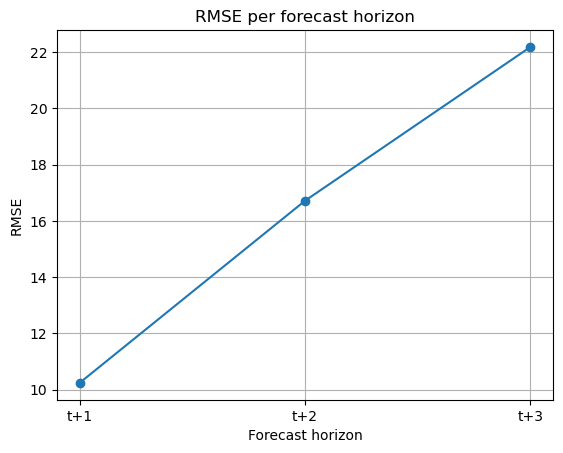

In [15]:
plt.plot([f't+{i+1}' for i in range(steps_out)], rmse_scores, marker='o')
plt.title('RMSE per forecast horizon')
plt.xlabel('Forecast horizon')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()